In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
%matplotlib inline

In [2]:
columns_names=['user_id','item_id','rating','timestamp']

In [3]:
df=pd.read_csv('u.data',sep='\t',names=columns_names)
# Tab seprated file '\t'

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
df1=pd.read_csv('u.data')

In [6]:
df1.head()

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


In [7]:
movie_titles=pd.read_csv('Movie_Id_Titles')

In [8]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df=pd.merge(df,movie_titles,on='item_id')

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [11]:
sb.set_style('whitegrid')

In [12]:
df.groupby('title').head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [13]:
df.groupby('title')['rating'].head()

0         5
1         5
2         4
3         5
4         5
         ..
99998     4
99999     3
100000    3
100001    3
100002    3
Name: rating, Length: 7404, dtype: int64

In [14]:
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [15]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [16]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [17]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [18]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
# rating depends on how many people rated it

In [63]:
ratings['num ratings']=df.groupby('title')['rating'].count()

In [21]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [22]:
import cufflinks as cf

In [23]:
cf.go_offline()

In [24]:
ratings['num of ratings'].iplot(kind='hist')

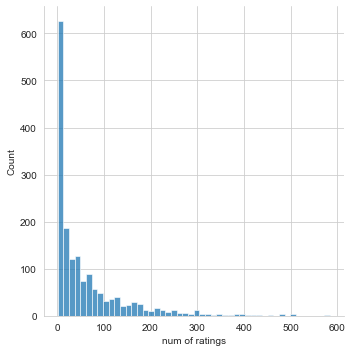

In [25]:
sb.displot(ratings['num of ratings'])

In [26]:
ratings['rating'].iplot(kind='hist')

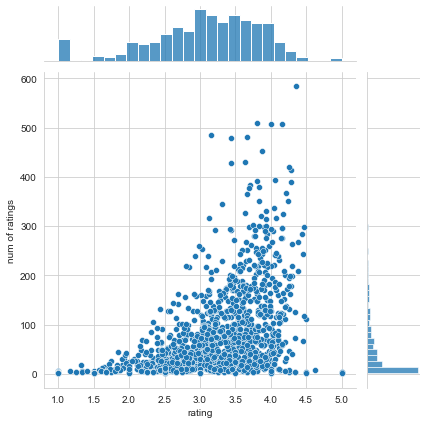

In [27]:
sb.jointplot(x='rating',y='num of ratings',data=ratings)

In [28]:
 px.scatter(ratings, x="rating", y="num of ratings", marginal_x="histogram", marginal_y="rug")

# Build Recomender System

In [29]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [30]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')

In [52]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
ratings.head(3)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109


In [67]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [69]:
ratings.sort_values('rating',ascending=False).head(10)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
"Great Day in Harlem, A (1994)",5.0,1
Aiqing wansui (1994),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


In [70]:
moviemat['Star Wars (1977)']

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [33]:
starwars_usr_ratings=moviemat['Star Wars (1977)']
liarliar_user_ratings=moviemat['Liar Liar (1997)']

In [34]:
starwars_usr_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [75]:
moviemat.corrwith(starwars_usr_ratings)

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [36]:
similar_to_starwars=moviemat.corrwith(starwars_usr_ratings)

In [73]:
similar_to_liarliar=moviemat.corrwith(liarliar_user_ratings)

In [74]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [38]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['correlation'])
corr_starwars.dropna(inplace=True)

In [39]:
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [40]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


In [48]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [49]:
corr_starwars.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [51]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [55]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['correlation'])

In [56]:
corr_liarliar.dropna(inplace=True)

In [57]:
corr_liarliar=corr_liarliar.join(ratings['num of ratings'])

In [59]:
corr_liarliar

,correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41


In [61]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
